# Evaluation Project - 2 (Space Server)

### The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

## Objective

The objective of the project is to identify the target variable based in the featuers that whether it is a Star, Galaxy or Quasar

In [1]:
#Let's load the necessary Libraries

#Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

#Data Visualziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress warnings for a clean notebook
import warnings
warnings.filterwarnings('ignore')

#Print all the librares are loaded successfully
print('All the Libraries are Loaded Successfully')

All the Libraries are Loaded Successfully


In [2]:
#Let's load the Data Set of Agriculture

space=pd.read_csv('space_server.csv')
print('Space Server dataset has been loaded successfully')

Space Server dataset has been loaded successfully


In [3]:
#Let's check the dataset

space.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


### Data Description

__objid__ : Object Identifier

__ra__ : J2000 Right Ascension (r-band)

__dec__ : J2000 Declination (r-band)

__u__ : better of DeV/Exp magnitude fit

__g__ : better of DeV/Exp magnitude fit

__r__ : better of DeV/Exp magnitude fit

__i__ : better of DeV/Exp magnitude fit

__z__ : better of DeV/Exp magnitude fit

__run__ : Run Number

__rereun__ : Rerun Number

__camcol__ : Camera column

__field__ : Field number

__specobjid__ : Object Identifier

__class__ : object class (galaxy, star or quasar object)

__redshift__ : Final Redshift

__plate__ : plate number

__mjd__ : MJD of observation

__fiberid__ : fiber ID

## Featured Engineering

### Data Preprocessing

In [4]:
#Let's check the shape of our DataSet

space.shape

(10000, 18)

We have 10000 rows and 18 columns in our dataset

In [5]:
#Let's check the value counts in each columns

for i in space.columns:
    print(space[i].value_counts())
    print('\n')

1.237650e+18    10000
Name: objid, dtype: int64


226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64


 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64


18.90212    3
18.99697    3
18.98400    3
19.53507    3
19.56350    3
           ..
19.27596    1
19.51822    1
18.23952    1
18.47838    1
18.77445    1
Name: u, Length: 9730, dtype: int64


17.55623    3
17.75478    3
17.60766    3
18.31910    3
17.53612    2
           ..
16.79101    1
18.01411    1
16.93613    1
17.68695    1
17.87934    1
Name: g, Length: 9817, dtype: int64


15.99986    3
16.48978    3
16.70929    2
17.21182    2
16.27899    2
           ..
19.18255    1
16.03177    1
16.27091    1
17.4532

We can observe that rerun contain only one unique value so we can drop that column as it is of no use for us in our analysis

In [6]:
space.drop(['rerun','objid'], inplace=True,axis=1)

In [7]:
#Let's check the numeric columns details

numeric_features=space.select_dtypes(include=[np.number])
numeric_features.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [8]:
#Let's check the catagorical columns details

catagorical_features=space.select_dtypes(include=[np.object])
catagorical_features.columns

Index(['class'], dtype='object')

### Data Cleaning

In [9]:
#Let's check for the null values in our DataSet

space.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

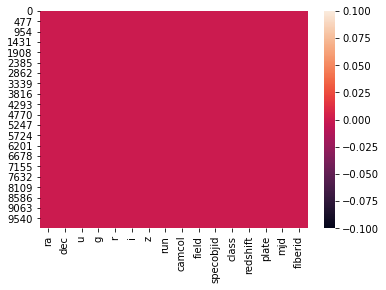

In [10]:
#Let's plot the heat map for null values

sns.heatmap(space.isnull())
plt.show()

We can observe from the above table and heatmap that we do not have any null values in our dataset

In [11]:
#Let's check the Data Types of our DataSet

space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         10000 non-null  float64
 1   dec        10000 non-null  float64
 2   u          10000 non-null  float64
 3   g          10000 non-null  float64
 4   r          10000 non-null  float64
 5   i          10000 non-null  float64
 6   z          10000 non-null  float64
 7   run        10000 non-null  int64  
 8   camcol     10000 non-null  int64  
 9   field      10000 non-null  int64  
 10  specobjid  10000 non-null  float64
 11  class      10000 non-null  object 
 12  redshift   10000 non-null  float64
 13  plate      10000 non-null  int64  
 14  mjd        10000 non-null  int64  
 15  fiberid    10000 non-null  int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 1.2+ MB


### Observations:
    
    1- We have a total of 10000 rows and 18 columns in our dataset
    
    2- There are 3 types of Data Types in our dataset:
        
        i-   object - class
        ii-  int64 & float64 - objid, ra, dec, u, g, r, i,
             z, run, rerun, camcol, field, specobjid, redshift,  
             plate, mjd, fiberid

## Exporatory Data Analysis

In [12]:
#Let's check the correlation

space.corr().style.background_gradient(cmap='coolwarm')

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.040809,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,-0.093724,0.015414,-0.093723,-0.086558,-0.040493


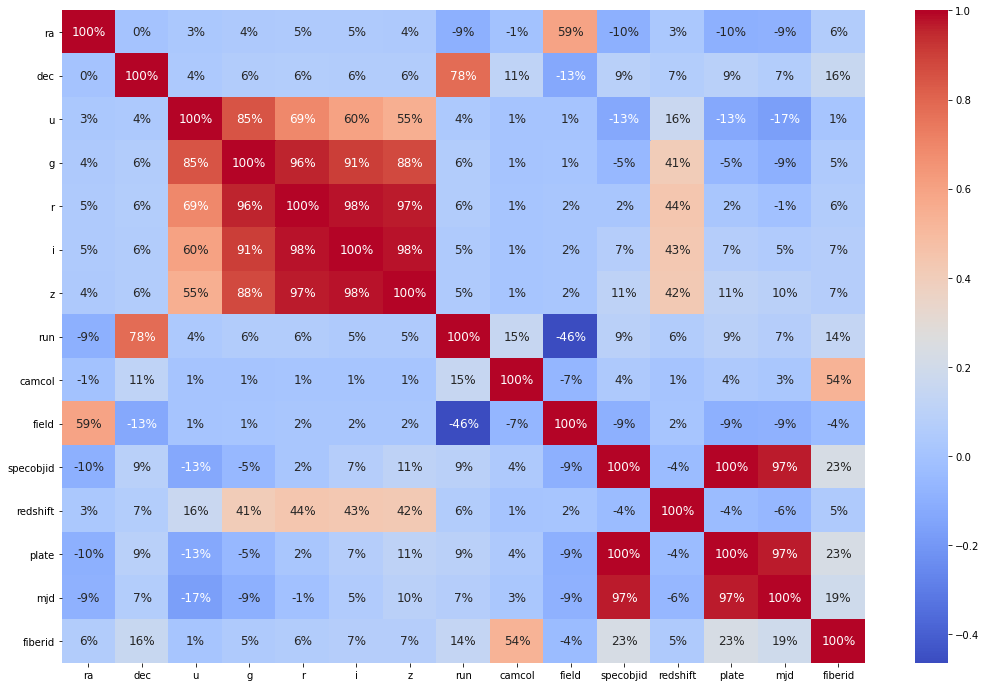

In [13]:
#Let's plot the heat map for the correlation matrix

plt.figure(figsize=(18,12))
sns.heatmap(space.corr(),annot=True,cmap='coolwarm',fmt='0.0%',annot_kws={"size":12});

### Observations:
    
    1- Better of DeV/Exp magnitude fit (g,r,i,z) have strong positive
       correlation with each other.
        
    2- Plate, mjd and u, g have low negative correlation with each other.
    
    3- plate and mjd have strong correlation with each other
    
    4- Plate, mjd and spaceobjid have strong positive correlation with each other.
    
    5- plate, mjd have low negative correlation with field

# Exploratory Data Analysis

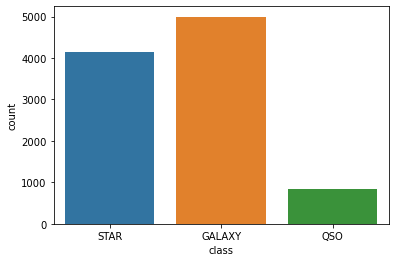

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [14]:
#Let's plot the count plot for class

sns.countplot(x= 'class', data = space)
plt.show()
print(space['class'].value_counts())

We can observe that we have 4998 galaxy, 4152 stars and 850 qso in our dataset 

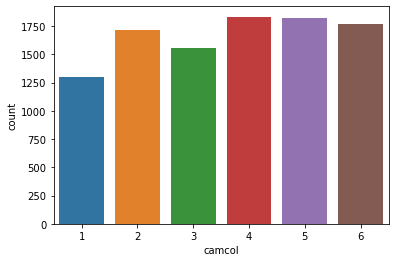

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [15]:
#Let's plot the count plot for objid

sns.countplot(x= 'camcol', data = space)
plt.show()
print(space['camcol'].value_counts())

We can observe that camera type 4 is the highest followed by type 5,6,2,3,1

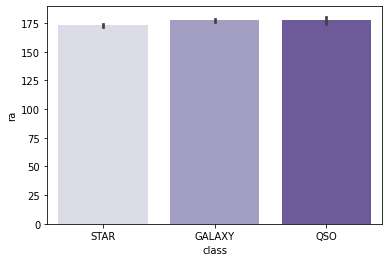

In [16]:
sns.barplot(x='class',y='ra',data=space,palette='Purples')

We can observe that Galaxy and Qso have almost same count and Star is slightly less

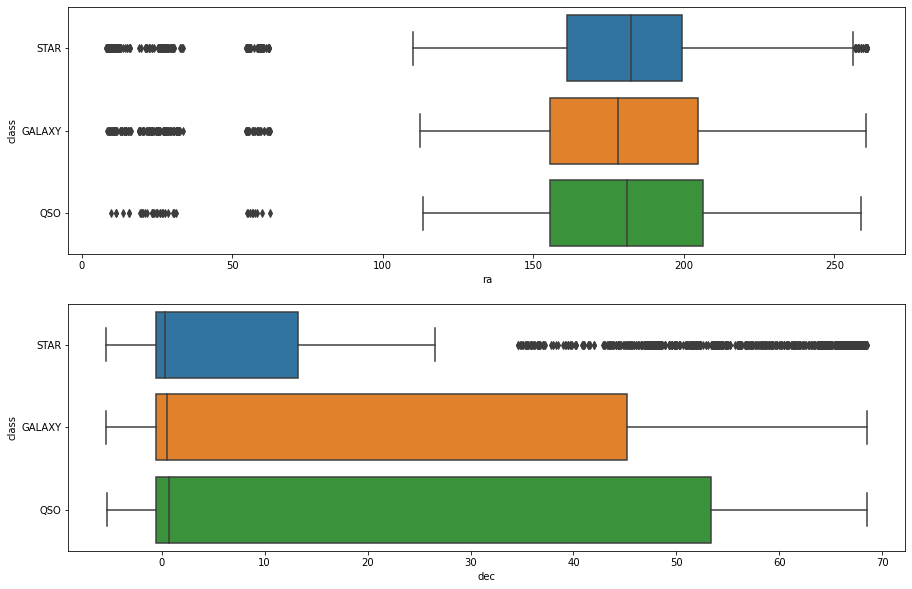

In [17]:
f, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.boxplot(y='class', x='ra', data=space, ax=axes[0]);
sns.boxplot(y='class', x='dec', data=space, ax=axes[1]);

## Observations:
                    
            1- We can observe that we have many outlier in ra and dec
            
            2- In ra data is almost normally distributed
            
            3- In dec data is positively skewed and in Star there are outliers.
            
            4- We can also observe that the Qso is is not clustered aroound the mean and data is spread.

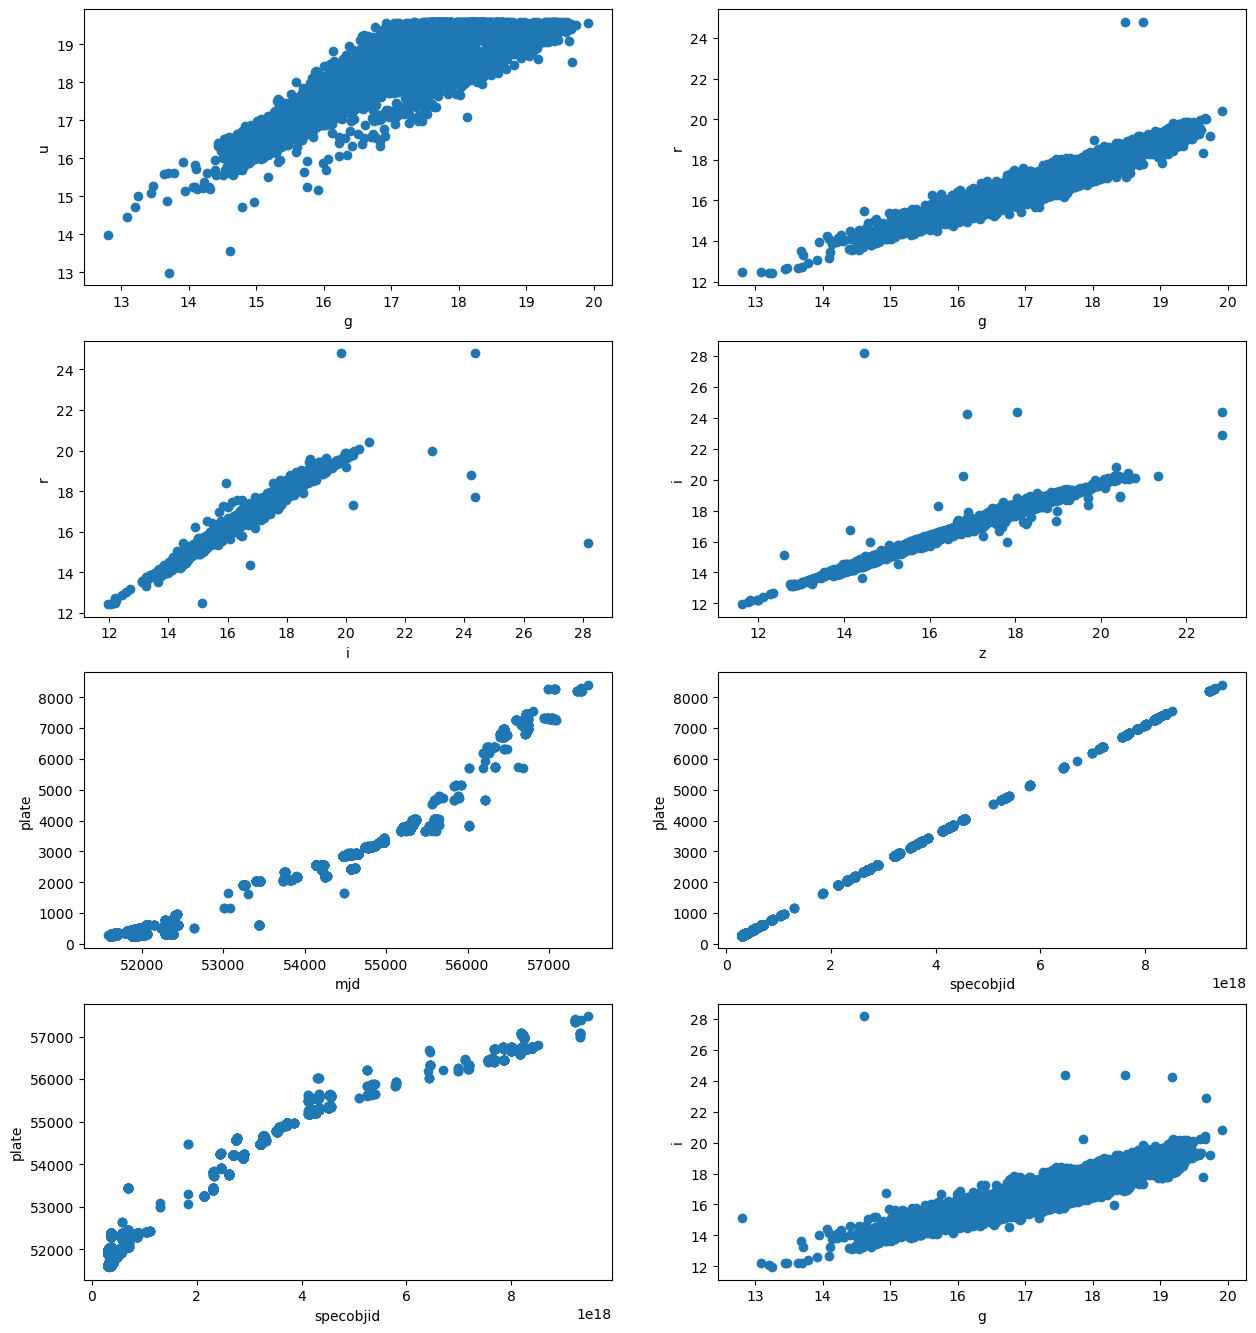

In [18]:
plt.figure(figsize=(15,30), dpi=100)
plt.subplot(7,2,1)
plt.scatter('g','u', data=space)
plt.xlabel('g')
plt.ylabel('u')
plt.subplot(7,2,2)
plt.scatter('g','r',data=space)
plt.xlabel('g')
plt.ylabel('r')
plt.subplot(7,2,3)
plt.scatter('i','r',data=space)
plt.xlabel('i')
plt.ylabel('r')
plt.subplot(7,2,4)
plt.scatter('z','i',data=space)
plt.xlabel('z')
plt.ylabel('i')
plt.subplot(7,2,5)
plt.scatter('mjd','plate',data=space)
plt.xlabel('mjd')
plt.ylabel('plate')
plt.subplot(7,2,6)
plt.scatter('specobjid','plate',data=space)
plt.xlabel('specobjid')
plt.ylabel('plate')
plt.subplot(7,2,7)
plt.scatter('specobjid','mjd',data=space)
plt.xlabel('specobjid')
plt.ylabel('mjd')
plt.ylabel('plate')
plt.subplot(7,2,8)
plt.scatter('g','i',data=space)
plt.xlabel('g')
plt.ylabel('i')

plt.show()

 We can observe that in all the graphs we have a positive relation as the one value will increase the other will also increase

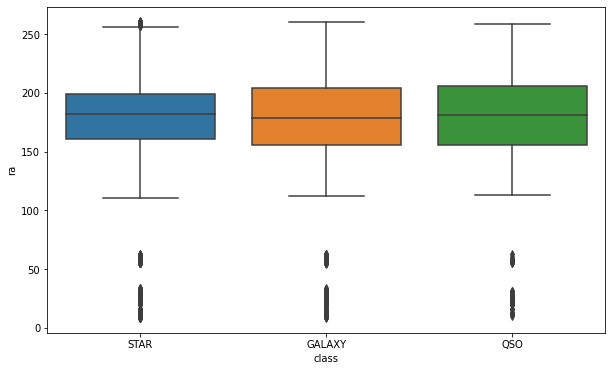

In [19]:
plt.figure(figsize = (10,6))
sns.boxplot(y = 'ra', x = 'class', data = space);

We can observe that median for all the three class are same and all the three classes have outliers.

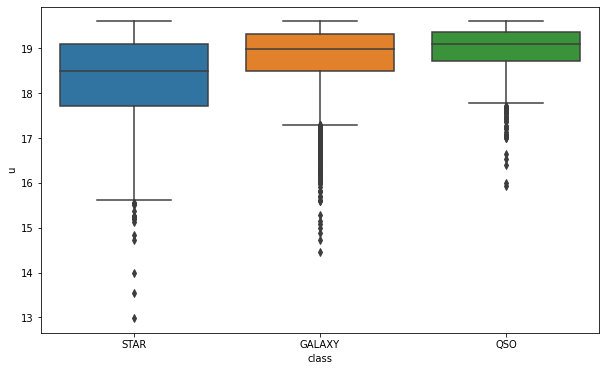

In [20]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'class', y = 'u', data = space);

We can observe that we have many outliers present in the data and median for all the three classes varies and data is also positively skewed

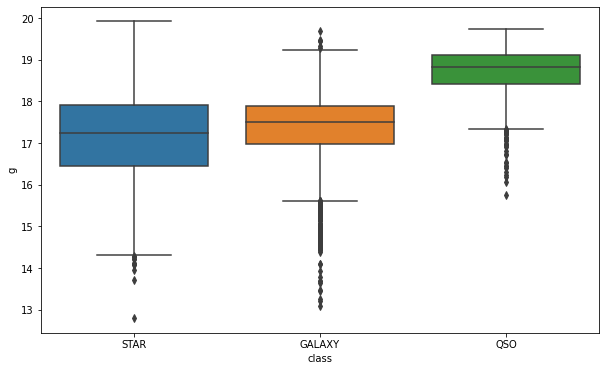

In [21]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'class', y = 'g', data = space);

 We can observe that the galaxy is peaked skewed and Qso is positively skewed

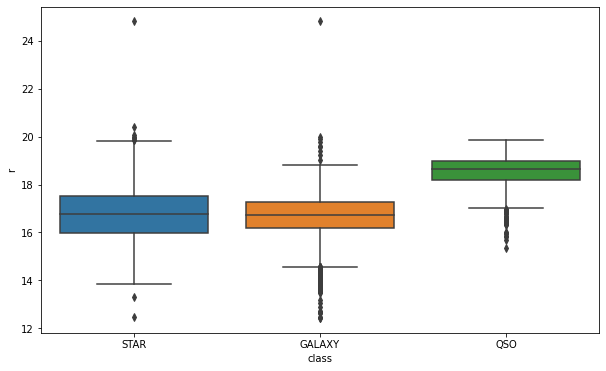

In [22]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'class', y = 'r', data = space);

We can observe that there are many outliers present. star and galaxy has almost same median but Qso is negatively skewed

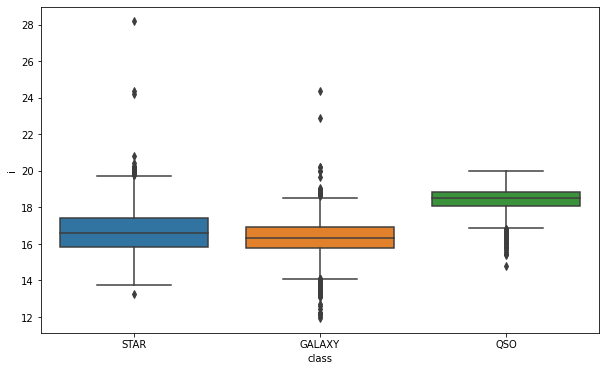

In [23]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'class', y = 'i', data = space);

We can observe that the data is concentrated and star and galaxy are normally distributed and Qso is having variation in the mean as compared to the Star and galaxy

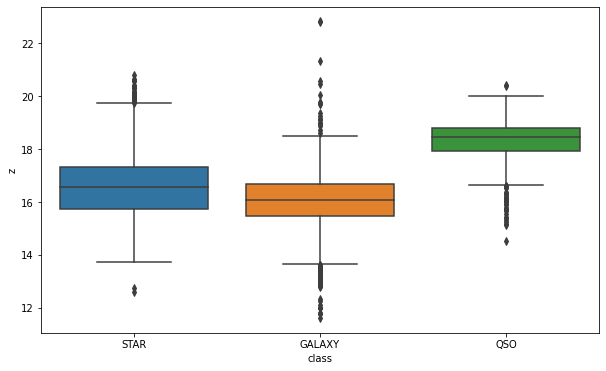

In [24]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'class', y = 'z', data = space);

We have many outlier in the galaxy and the data is clustered towards the mean

Text(0.5, 1.0, 'Equatorial coordinates')

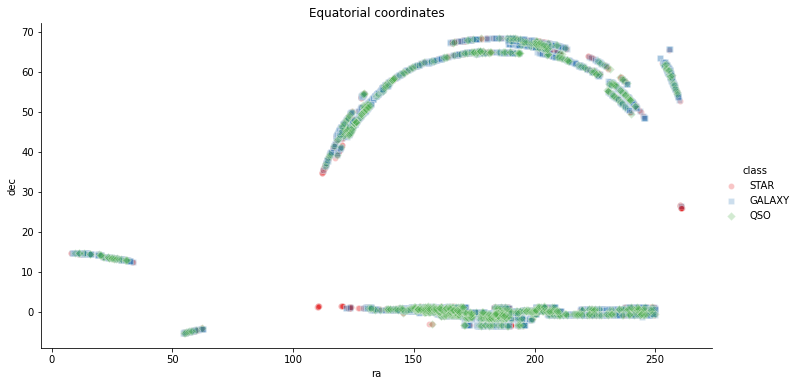

In [25]:
sns.pairplot(x_vars='ra', y_vars='dec', data=space, hue='class',palette="Set1", size=5,
             aspect=2,markers=["o", "s", "D"],plot_kws={'alpha': 0.25})
plt.title('Equatorial coordinates')

Looking at the above plot of right ascention and declination for each of our class types, we see that there is no clear seperation in the positions of our objects. We can conclude that these features will not add any real predictive value to our model and therefore we can feel confident in dropping them from our dataset.

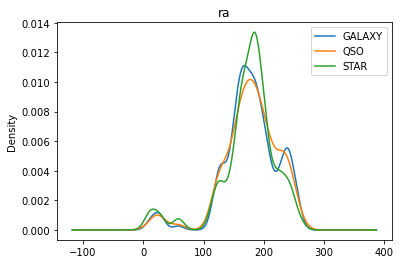

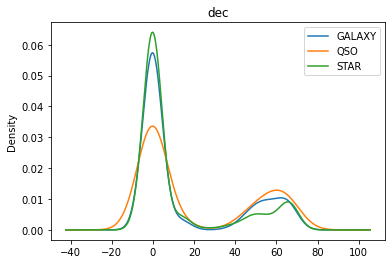

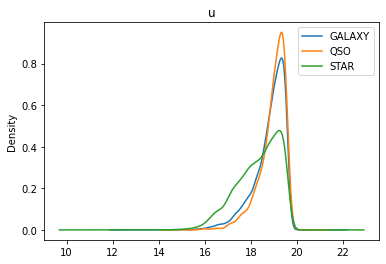

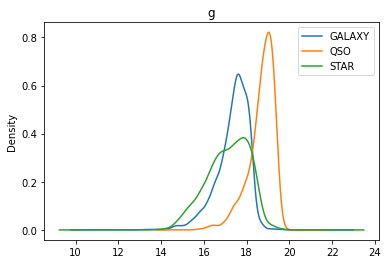

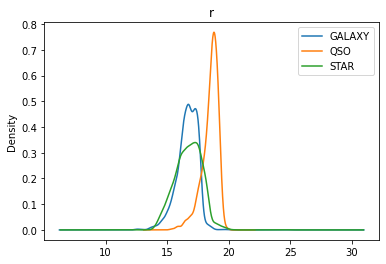

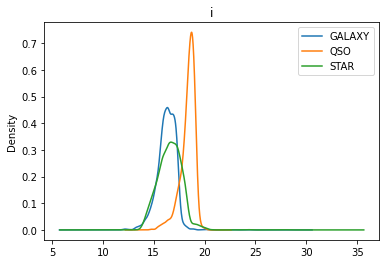

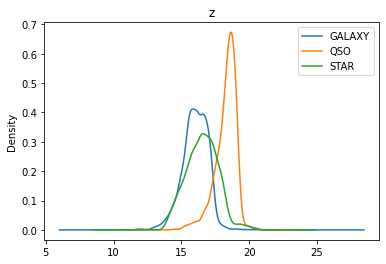

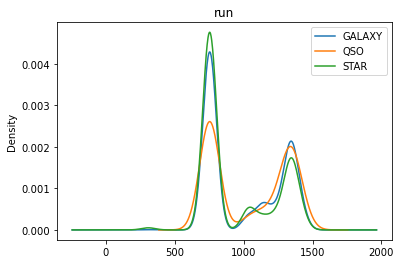

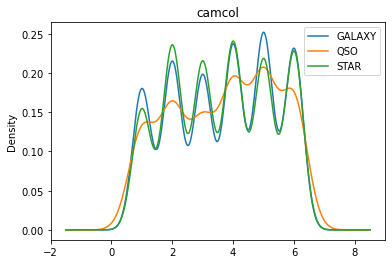

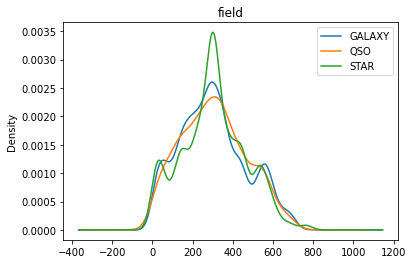

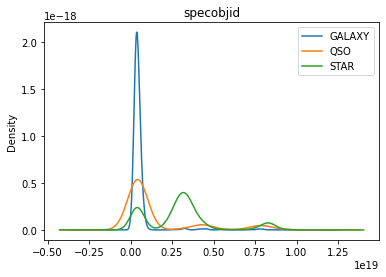

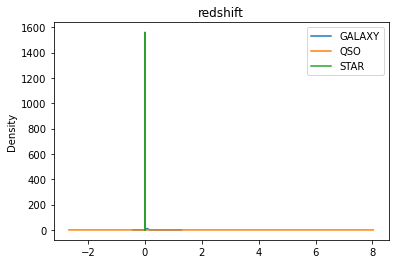

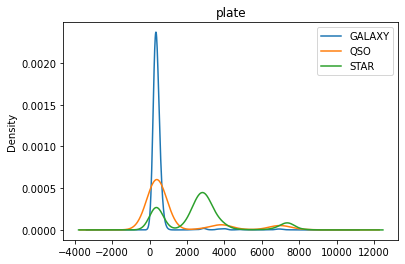

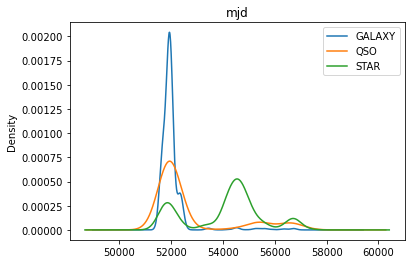

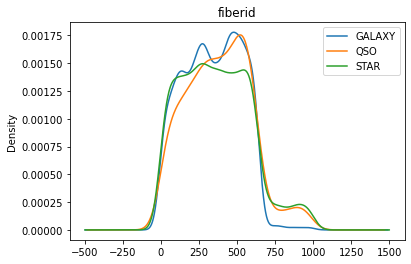

In [26]:
for column in space.columns:
    if column not in ['rerun','class']:
        space.groupby('class')[column].plot.kde()
        plt.title(column)
        plt.legend()
        plt.show()

We can observe that the number of distributions are multi-modal i.e they have more than one typical values.

## Data Prepration

#### Let's drop unnecessary columns which are not required for our analysis

In [27]:
space.drop(['ra','dec'], inplace=True,axis=1)

In [28]:
#Let's encode our data using label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(space.columns)):
    space[space.columns[column]]=le.fit_transform(space[space.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [29]:
mappings

[{0: 12.98897,
  1: 13.551779999999999,
  2: 13.99371,
  3: 14.45856,
  4: 14.72825,
  5: 14.72858,
  6: 14.846260000000001,
  7: 14.87345,
  8: 15.002,
  9: 15.079920000000001,
  10: 15.1353,
  11: 15.1585,
  12: 15.198889999999999,
  13: 15.19925,
  14: 15.222079999999998,
  15: 15.245970000000002,
  16: 15.25174,
  17: 15.252889999999999,
  18: 15.259920000000001,
  19: 15.28501,
  20: 15.369520000000001,
  21: 15.51874,
  22: 15.551379999999998,
  23: 15.56055,
  24: 15.56296,
  25: 15.594439999999999,
  26: 15.60295,
  27: 15.61495,
  28: 15.615520000000002,
  29: 15.61899,
  30: 15.621210000000001,
  31: 15.62606,
  32: 15.643120000000001,
  33: 15.651539999999999,
  34: 15.68671,
  35: 15.691270000000001,
  36: 15.699539999999999,
  37: 15.700820000000002,
  38: 15.70475,
  39: 15.7049,
  40: 15.70621,
  41: 15.71824,
  42: 15.79229,
  43: 15.79393,
  44: 15.802679999999999,
  45: 15.8167,
  46: 15.8206,
  47: 15.820689999999999,
  48: 15.8452,
  49: 15.84934,
  50: 15.857339999

### Plotting Outliers

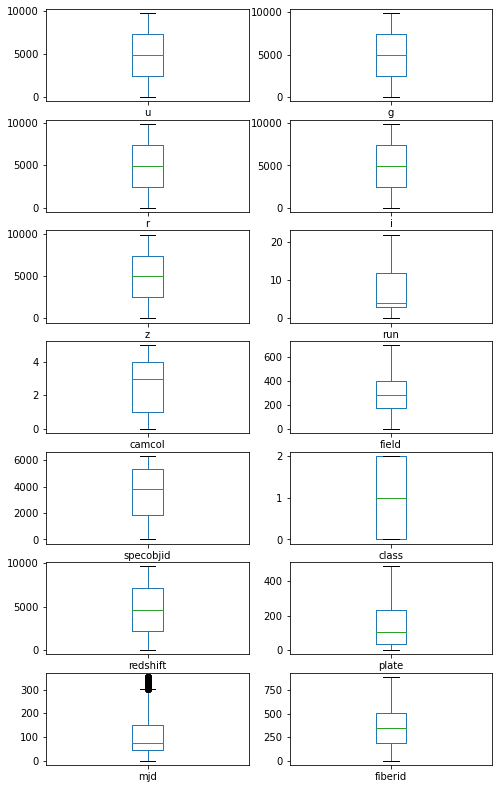

In [30]:
space.plot(kind='box',subplots=True,figsize=(8,20),layout=(10,2))
plt.show()

We can observe that the mjd have outliers and mostly data is positively slewed

In [31]:
space.head(5)

,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,8818,3143,1853,1594,1474,3,3,256,5641,2,1681,267,182,490
1,4066,3722,4220,4703,4956,3,3,256,2267,2,1437,49,6,540
2,8203,8155,7210,6793,6350,3,3,257,1289,0,8222,21,80,512
3,1569,1960,2431,2897,3415,3,3,258,5642,2,1162,267,182,509
4,1206,1255,3347,4943,5701,3,3,258,5642,2,3501,267,182,511


In [32]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   u          10000 non-null  int64
 1   g          10000 non-null  int64
 2   r          10000 non-null  int64
 3   i          10000 non-null  int64
 4   z          10000 non-null  int64
 5   run        10000 non-null  int64
 6   camcol     10000 non-null  int64
 7   field      10000 non-null  int64
 8   specobjid  10000 non-null  int64
 9   class      10000 non-null  int32
 10  redshift   10000 non-null  int64
 11  plate      10000 non-null  int64
 12  mjd        10000 non-null  int64
 13  fiberid    10000 non-null  int64
dtypes: int32(1), int64(13)
memory usage: 1.0 MB


In [33]:
#Let's check the skewness of our DataSet

space.skew()

u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.978221
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate        0.888700
mjd          1.177842
fiberid      0.150256
dtype: float64

In [34]:
# Let's treat the skewness

for col in space.columns:
    if space[col].skew()>0.55:
        space[col]=np.log1p(space[col])

In [35]:
#Let's recheck the skewness of our DataSet

space.skew()

u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.448988
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate       -0.852625
mjd         -0.994669
fiberid      0.150256
dtype: float64

We have successfully removed the skewness from our dataset

## Model Prepration

In [36]:
#Let's split the data into 'x' independent and 'y' dependent variables

x = space.drop(['class'],axis=1)
y = space['class']

In [37]:
#First let's scale our model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x)
x_train=pd.DataFrame(x_train,columns=x.columns)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.2f}%")

In [40]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=10, random_state=42)
log.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {log.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {log.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 93.11%
Accuracy of Test Dataset: 92.45%


In [41]:
y_predict=log.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[2 0 0 ... 0 0 2]

Confusion Matrix: 
 [[936  39  24]
 [ 61 117   0]
 [ 21   6 796]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       999
           1       0.72      0.66      0.69       178
           2       0.97      0.97      0.97       823

    accuracy                           0.92      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.92      0.92      0.92      2000


Accuracy : 92.45%


In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
tree.fit(x_train, y_train)
print(f"Accuracy of Train Dataset: {tree.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 98.88%
Accuracy of Test Dataset: 98.80%


In [43]:
y_predict=tree.predict(x_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[2 1 0 ... 1 0 2]

Confusion Matrix: 
 [[990   5   4]
 [ 14 164   0]
 [  1   0 822]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       999
           1       0.97      0.92      0.95       178
           2       1.00      1.00      1.00       823

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000


Accuracy : 98.80%


In [44]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {forest.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {forest.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 98.95%


In [45]:
y_predict=forest.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 1 0 2]

Confusion Matrix: 
 [[991   4   4]
 [ 13 165   0]
 [  0   0 823]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       999
           1       0.98      0.93      0.95       178
           2       1.00      1.00      1.00       823

    accuracy                           0.99      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000


Accuracy : 98.95%


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gbc.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 99.95%
Accuracy of Test Dataset: 98.85%


In [47]:
y_predict=gbc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 1 0 2]

Confusion Matrix: 
 [[989   8   2]
 [ 11 167   0]
 [  1   1 821]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       999
           1       0.95      0.94      0.94       178
           2       1.00      1.00      1.00       823

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000


Accuracy : 98.85%


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
tree_ex=ExtraTreesClassifier(criterion = "entropy", random_state =100,max_depth=3, min_samples_leaf=5)
tree_ex.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {tree_ex.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree_ex.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 91.10%
Accuracy of Test Dataset: 91.75%


In [49]:
y_predict=tree_ex.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 1 0 2]

Confusion Matrix: 
 [[984   2  13]
 [ 59 114   5]
 [ 86   0 737]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       999
           1       0.98      0.64      0.78       178
           2       0.98      0.90      0.93       823

    accuracy                           0.92      2000
   macro avg       0.94      0.84      0.88      2000
weighted avg       0.92      0.92      0.92      2000


Accuracy : 91.75%


In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {knn.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {knn.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 98.47%
Accuracy of Test Dataset: 98.15%


In [51]:
y_predict=knn.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 1 0 2]

Confusion Matrix: 
 [[975  11  13]
 [ 10 168   0]
 [  3   0 820]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       999
           1       0.94      0.94      0.94       178
           2       0.98      1.00      0.99       823

    accuracy                           0.98      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000


Accuracy : 98.15%


In [52]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gnb.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gnb.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 92.24%
Accuracy of Test Dataset: 92.05%


In [53]:
y_predict=gnb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 1 0 2]

Confusion Matrix: 
 [[915  56  28]
 [ 15 163   0]
 [ 60   0 763]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       999
           1       0.74      0.92      0.82       178
           2       0.96      0.93      0.95       823

    accuracy                           0.92      2000
   macro avg       0.88      0.92      0.90      2000
weighted avg       0.92      0.92      0.92      2000


Accuracy : 92.05%


In [54]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {adb.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {adb.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 89.90%
Accuracy of Test Dataset: 89.30%


In [55]:
y_predict=adb.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 0 0 2]

Confusion Matrix: 
 [[945  46   8]
 [106  72   0]
 [ 54   0 769]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       999
           1       0.61      0.40      0.49       178
           2       0.99      0.93      0.96       823

    accuracy                           0.89      2000
   macro avg       0.82      0.76      0.78      2000
weighted avg       0.89      0.89      0.89      2000


Accuracy : 89.30%


In [56]:
models=pd.DataFrame({'Model':['Logistics Regression','Decision Tree','Random Forest','Gradient Boosting','Extra Trees','KNeighbors','GaussianNB','AdaBoost'],
                     'Training Accuracy':[(log.score(x_train,y_train)*100),tree.score(x_train,y_train)*100,forest.score(x_train,y_train)*100,gbc.score(x_train,y_train)*100,tree_ex.score(x_train,y_train)*100,knn.score(x_train,y_train)*100,gnb.score(x_train,y_train)*100,adb.score(x_train,y_train)*100],
                     'Test Accuracy':[(log.score(x_test,y_test)*100),tree.score(x_test,y_test)*100,forest.score(x_test,y_test)*100,gbc.score(x_test,y_test)*100,tree_ex.score(x_test,y_test)*100,knn.score(x_test,y_test)*100,gnb.score(x_test,y_test)*100,adb.score(x_test,y_test)*100]})

models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Test Accuracy
2,Random Forest,100.0000,98.95
3,Gradient Boosting,99.9500,98.85
1,Decision Tree,98.8750,98.80
5,KNeighbors,98.4750,98.15
0,Logistics Regression,93.1125,92.45
6,GaussianNB,92.2375,92.05
4,Extra Trees,91.1000,91.75
7,AdaBoost,89.9000,89.30


### After observing the accuarcay score of all the models we can say that our model has performed well on the test and train dataset. Our model is also not underperforming or is not under or over fitting. Let's do the cross validation and choose the best model

In [57]:
#Let's check the cross validatation for our models

from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=42)
models=[('Logistic Regression', log),('Decision Tree',tree),
        ('Random Forest',forest),('GradientBoostingClassifier', gbc),('ExtraTreesClassifier', tree_ex),('KNeighborsClassifier', knn),
       ('GaussianNB', gnb),('AdaBoostClassifier', adb)]

for model in models:
    results=model_selection.cross_val_score(model[1],x_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression: 93.09%
Cross validated Accuracy of Decision Tree: 98.76%
Cross validated Accuracy of Random Forest: 98.90%
Cross validated Accuracy of GradientBoostingClassifier: 99.02%
Cross validated Accuracy of ExtraTreesClassifier: 91.00%
Cross validated Accuracy of KNeighborsClassifier: 97.91%
Cross validated Accuracy of GaussianNB: 92.15%
Cross validated Accuracy of AdaBoostClassifier: 87.44%


###  After applying cross validation and checking he score we can clearly say the GradientBoostClassifier gives the best score of 99% and the model is also not suffering from Underfitting and Overfitting

### So we will choose the Gradient Boositng Classifier as our best model for prediction

In [58]:
#Let's use GridSearchCV to tune our parameters for GradientBoositngClassifier

from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],
    'n_estimators':[10],
    }
#params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy']}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  1.7min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [3, 5, 8], 'n_estimators': [10]},
             verbose=1)

In [59]:
grid_search_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=10,
                           random_state=42)

#### Using gradinet boost with the best parameters

In [60]:
#Gradient Boosting Classifier with our best result

gbc=GradientBoostingClassifier(learning_rate=0.15, max_depth=5, n_estimators=10,
                           random_state=42)
gbc.fit(x_train,y_train)
print(f"Accuracy of Train Dataset: {gbc.score(x_train,y_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(x_test,y_test)*100:0.2f}%")

Accuracy of Train Dataset: 99.66%
Accuracy of Test Dataset: 98.80%


In [61]:
y_predict=gbc.predict(x_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[2 1 0 ... 1 0 2]

Confusion Matrix: 
 [[989   9   1]
 [ 14 164   0]
 [  0   0 823]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       999
           1       0.95      0.92      0.93       178
           2       1.00      1.00      1.00       823

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000


Accuracy : 98.80%


## Our model is performing very well with and accuracy of 98.8 %.

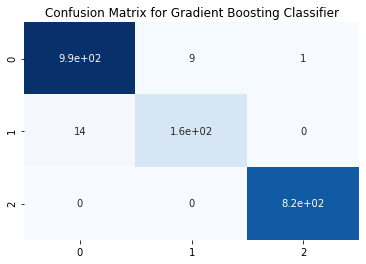

In [62]:
#Let's plot the confusion matrix for the Gradient Boosting Classifier

cm=confusion_matrix(y_test,gbc.predict(x_test))
sns.heatmap(cm,annot=True,cmap='Blues',cbar=False,)

plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

In [63]:
#Let's save the model

import joblib

#save the model as a pickle in a file
joblib.dump(gbc,'Space_Server.pkl')

['Space_Server.pkl']

# GradientBoostClassifier gives the best score of 99% and the model is also not suffering from Underfitting and Overfitting